In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "C:/Users/Admin/Documents/Untitled Folder"

In [4]:
df = pd.read_csv(PATH + "/all.csv")


In [5]:
file1 = open(PATH + '/NYSE.txt',"r") 
NYSE_stocks = []
for line in file1:
    ln = line.split('\t')
    ln[1] = ln[1].split('\n')[0]
    NYSE_stocks.append(ln)
file1.close()

In [6]:
NYSE_stocks = NYSE_stocks[1:-1]

In [7]:
NYSE_indexes = []
for stock in NYSE_stocks:
    index = stock[0]
    NYSE_indexes.append(index)
print(NYSE_indexes)

['A', 'AA', 'AAC', 'AAN', 'AAP', 'AAT', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABR-A', 'ABR-B', 'ABR-C', 'ABT', 'AC', 'ACA', 'ACB', 'ACC', 'ACCO', 'ACH', 'ACM', 'ACN', 'ACP', 'ACRE', 'ACV', 'ADC', 'ADM', 'ADNT', 'ADS', 'ADSW', 'ADT', 'ADX', 'AEB', 'AEE', 'AEG', 'AEH', 'AEL', 'AEM', 'AEO', 'AEP', 'AEP-B', 'AER', 'AES', 'AFB', 'AFC', 'AFG', 'AFGB', 'AFGE', 'AFGH', 'AFI', 'AFL', 'AFT', 'AG', 'AGCO', 'AGD', 'AGI', 'AGM', 'AGM-A', 'AGM-C', 'AGM-D', 'AGM.A', 'AGN', 'AGO', 'AGO-B', 'AGO-E', 'AGO-F', 'AGR', 'AGRO', 'AGS', 'AGX', 'AHC', 'AHH', 'AHH-A', 'AHL-C', 'AHL-D', 'AHL-E', 'AHT', 'AHT-D', 'AHT-F', 'AHT-G', 'AHT-H', 'AHT-I', 'AI', 'AI-B', 'AI-C', 'AIC', 'AIF', 'AIG', 'AIG-A', 'AIG.W', 'AIN', 'AIR', 'AIT', 'AIV', 'AIW', 'AIY', 'AIZ', 'AIZP', 'AJG', 'AJRD', 'AJX', 'AJXA', 'AKO.A', 'AKO.B', 'AKR', 'AKS', 'AL', 'AL-A', 'ALB', 'ALC', 'ALE', 'ALEX', 'ALG', 'ALK', 'ALL', 'ALL-A', 'ALL-B', 'ALL-D', 'ALL-E', 'ALL-F', 'ALL-G', 'ALL-H', 'ALL-Y', 'ALLE', 'ALLY', 'ALP-Q', 'ALSN', 'AL

<h1> Задание №2</h1>

In [8]:
def count_daily_profit(cur_day, next_day):
    return np.log(next_day / cur_day)

def get_log_profits(prices):
    profits = []
    # -1 чтобы за границы не выйти
    for i in range(len(prices) - 1):
        profits.append(count_daily_profit(prices[i], prices[i+1]))
    return profits

<h3> Подсчет дневных логарифмических доходностей </h3>

In [9]:
log_profits = []
for stock_index in NYSE_indexes:
    stock_log_profits = []
    stock_data = df.loc[df['ticker'] == stock_index]
    if stock_data.shape[0] == 0:
        continue
    stock_profits = get_log_profits(np.array(stock_data['close']))
    log_profits.append((stock_index, stock_profits))

<h5> Сохранение результатов в файл </h5>

In [10]:
file = open(PATH + '/log_profits.txt', 'w+')
log_profits_strs = str(log_profits)
file.writelines(log_profits_strs)
file.close()

<h3> Подсчет среднего и стандартного отклонения дневных логорифмических доходностей акций. Построение карты активов </h3>

In [11]:
stocks_means = []
stocks_std = []
stocks_indexes = []
for stock_log_profits in log_profits:
    stock_daily_profits = stock_log_profits
    stock_index = stock_daily_profits[0]
    stock_daily_profits = stock_daily_profits[1]
    stocks_means.append(np.mean(stock_daily_profits))
    stocks_std.append(np.std(stock_daily_profits))
    stocks_indexes.append(stock_index)

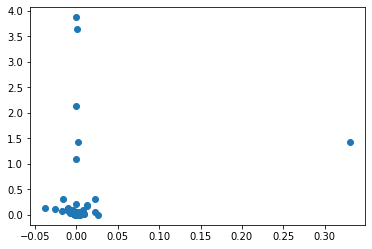

In [12]:
plt.plot(stocks_means, stocks_std, 'o')